<a href="https://colab.research.google.com/github/nafisa-maliyat/cvpr/blob/main/Final%20CPVR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [6]:

# CIFAR10 dataset Loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

170498071/170498071 [==============================] - 3s 0us/step
Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [7]:
# Normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshaping the input data
x_train = x_train.reshape((-1, 32, 32, 3))
x_test = x_test.reshape((-1, 32, 32, 3))

# Converting the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


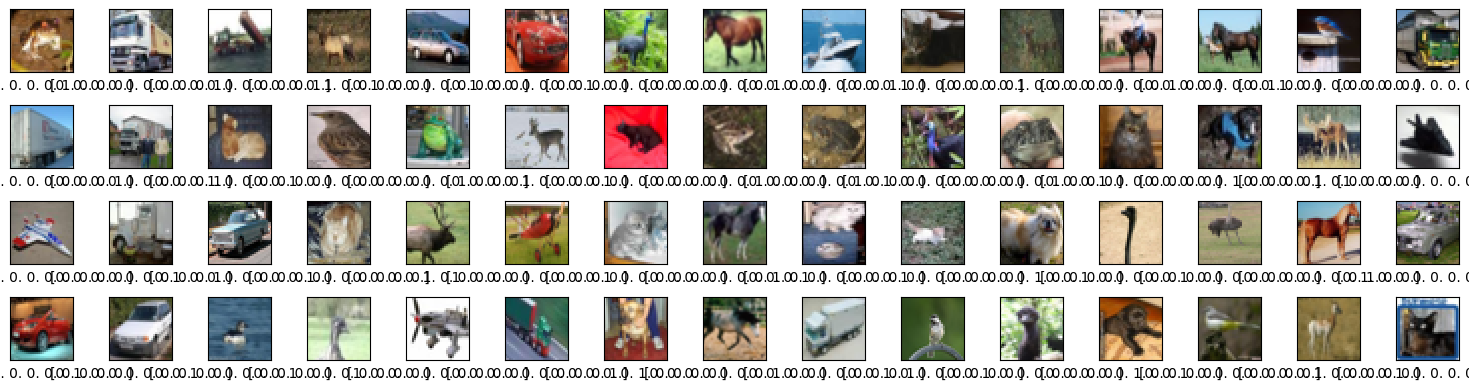

In [8]:
ROWS = 4
COLS = 15
i = 0

plt.figure(figsize=(15,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [9]:

def build_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

model = build_model()

In [10]:
# Applying SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

In [11]:
# Applying Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [12]:
# Applying RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


In [13]:
# Train the models and record their accuracy and loss
history_sgd = model_sgd.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)


Epoch 1/3
625/625 [==============================] - 55s 87ms/step - loss: 2.1482 - accuracy: 0.2190 - val_loss: 2.0119 - val_accuracy: 0.2832
Epoch 2/3
625/625 [==============================] - 52s 83ms/step - loss: 1.8875 - accuracy: 0.3316 - val_loss: 1.7964 - val_accuracy: 0.3553
Epoch 3/3
625/625 [==============================] - 54s 86ms/step - loss: 1.7023 - accuracy: 0.3969 - val_loss: 1.6174 - val_accuracy: 0.4268
Epoch 1/3
625/625 [==============================] - 55s 87ms/step - loss: 1.5127 - accuracy: 0.4571 - val_loss: 1.2989 - val_accuracy: 0.5424
Epoch 2/3
625/625 [==============================] - 55s 88ms/step - loss: 1.1643 - accuracy: 0.5911 - val_loss: 1.1143 - val_accuracy: 0.6144
Epoch 3/3
625/625 [==============================] - 54s 86ms/step - loss: 1.0206 - accuracy: 0.6450 - val_loss: 1.0575 - val_accuracy: 0.6369
Epoch 1/3
625/625 [==============================] - 58s 91ms/step - loss: 1.6433 - accuracy: 0.4098 - val_loss: 1.3590 - val_accuracy: 0.5214

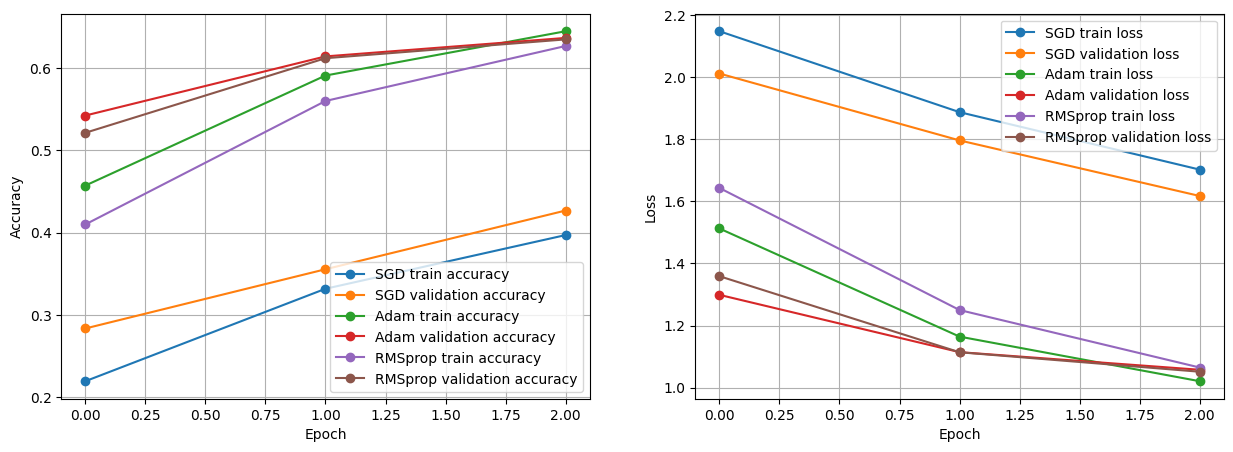

In [14]:
# Plot the comparison of the three optimizers' performance
plt.figure(figsize=(15,5))

# Plot the accuracy
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()